# Numpy
## 정렬

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### sort() 함수
- 기본은 옆으로 정렬한다

In [2]:
a = np.random.randint(10,size=10)
a

array([6, 9, 4, 7, 0, 4, 0, 8, 6, 9])

In [3]:
a.sort()

In [4]:
a

array([0, 0, 4, 4, 6, 6, 7, 8, 9, 9])

In [7]:
a[::-1]

array([9, 9, 8, 7, 6, 6, 4, 4, 0, 0])

In [8]:
a = np.random.randint(10,size=10)
a

array([6, 9, 5, 6, 8, 4, 5, 7, 3, 4])

In [11]:
a2 = np.sort(a)
a2

array([3, 4, 4, 5, 5, 6, 6, 7, 8, 9])

In [10]:
a

array([6, 9, 5, 6, 8, 4, 5, 7, 3, 4])

In [13]:
a = np.random.randint(25, size=[5,5])
a

array([[12,  5, 14, 15,  4],
       [ 4, 11, 22, 14, 19],
       [10, 11, 14, 17, 17],
       [15,  9, 20, 21,  7],
       [12, 24, 13,  3, 22]])

In [14]:
np.sort(a) # 옆으로 정렬 (axis=1)

array([[ 4,  5, 12, 14, 15],
       [ 4, 11, 14, 19, 22],
       [10, 11, 14, 17, 17],
       [ 7,  9, 15, 20, 21],
       [ 3, 12, 13, 22, 24]])

In [15]:
np.sort(a, axis=0) # 아래로 정렬 (axis=0)

array([[ 4,  5, 13,  3,  4],
       [10,  9, 14, 14,  7],
       [12, 11, 14, 15, 17],
       [12, 11, 20, 17, 19],
       [15, 24, 22, 21, 22]])

### 하나의 칼럼(속성)을 기준으로 정렬하기
- np.argsort()
- np.lexsort()

줄단위로 먼저 줄번호를 정렬한 다음, 도출된 인덱스를 기반으로 원본 데이터를 인덱싱한다

In [16]:
a

array([[12,  5, 14, 15,  4],
       [ 4, 11, 22, 14, 19],
       [10, 11, 14, 17, 17],
       [15,  9, 20, 21,  7],
       [12, 24, 13,  3, 22]])

In [24]:
a[ [1,2] ]

array([[ 4, 11, 22, 14, 19],
       [10, 11, 14, 17, 17]])

In [23]:
a[ :, [1,2] ]

array([[ 5, 14],
       [11, 22],
       [11, 14],
       [ 9, 20],
       [24, 13]])

In [17]:
last_col = a[:,-1]
last_col

array([ 4, 19, 17,  7, 22])

In [18]:
np.sort(last_col)

array([ 4,  7, 17, 19, 22])

In [19]:
np.argsort(last_col)

array([0, 3, 2, 1, 4], dtype=int64)

In [25]:
a[np.argsort(last_col)]

array([[12,  5, 14, 15,  4],
       [15,  9, 20, 21,  7],
       [10, 11, 14, 17, 17],
       [ 4, 11, 22, 14, 19],
       [12, 24, 13,  3, 22]])

In [18]:
a[np.argsort(a[:,-1])]

array([[24, 10, 12,  0,  1],
       [ 0,  4, 24,  6,  3],
       [11, 12,  1,  9,  6],
       [19, 18,  0,  3,  9],
       [20,  4, 21,  2, 24]])

#### 사례
```
X = iris[:,:4]
y = iris[:, 4]

X[np.argsort(y)]
```

In [26]:
a

array([[12,  5, 14, 15,  4],
       [ 4, 11, 22, 14, 19],
       [10, 11, 14, 17, 17],
       [15,  9, 20, 21,  7],
       [12, 24, 13,  3, 22]])

In [27]:
names = ['홍길동', '장길산', '이순신', '김유신', '한음']
a[np.argsort(names)]

array([[15,  9, 20, 21,  7],
       [10, 11, 14, 17, 17],
       [ 4, 11, 22, 14, 19],
       [12, 24, 13,  3, 22],
       [12,  5, 14, 15,  4]])

In [28]:
np.sort(names)

array(['김유신', '이순신', '장길산', '한음', '홍길동'], dtype='<U3')

In [30]:
np.argsort(names)

array([3, 2, 1, 4, 0], dtype=int64)

> **연습문제**<br>
> Iris 데이터를 첫번째 칼럼 기준으로 정렬하시오<br>
> 정렬된 데이터의 4가지 속성을 plt.plot() 함수를 이용하여 4가지 직선으로 시각화 하시오.

```
iris[]
iris[np.argsort()]
iris[np.argsort(iris[:,0])]
```

In [31]:
f = open('iris.csv')

line = f.readline()
features = line.strip().split(',')[:4]

labels = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

data = []
for line in f:
    l = line.strip().split(',')
    l[:4] = [float(i) for i in l[:4]]
    l[4] = labels.index(l[4])
    
    data.append(l)

f.close()

iris = np.array(data)

In [33]:
iris2 = iris[np.argsort(iris[:,0])]

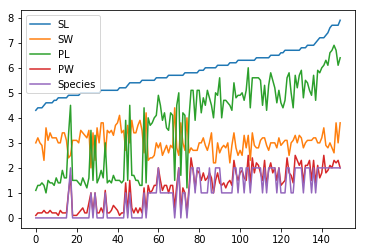

In [35]:
plt.plot(iris2)
plt.legend(['SL','SW','PL','PW','Species'])

- lexsort() 는 뒤의 인자를 먼저 기준을 잡아 정렬한다
- 정렬된 인덱스를 반환한다

In [22]:
np.lexsort([a[:,1],a[:,0]]) # 칼럼0 -> 칼럼1 순으로 정렬한 인덱스를 반환한다

array([2, 3, 1, 4, 0], dtype=int64)

In [23]:
a[np.lexsort([a[:,1],a[:,0]])]

array([[ 0,  4, 24,  6,  3],
       [11, 12,  1,  9,  6],
       [19, 18,  0,  3,  9],
       [20,  4, 21,  2, 24],
       [24, 10, 12,  0,  1]])

- np.argmax(), np.argmin() 함수도 있다

In [36]:
a

array([[12,  5, 14, 15,  4],
       [ 4, 11, 22, 14, 19],
       [10, 11, 14, 17, 17],
       [15,  9, 20, 21,  7],
       [12, 24, 13,  3, 22]])

In [37]:
np.argmax(a)

21

In [38]:
np.argmin(a)

23

In [39]:
np.argmax(a,axis=0)

array([3, 4, 1, 3, 4], dtype=int64)

In [41]:
a[np.argmax(a,axis=0)]

array([[15,  9, 20, 21,  7],
       [12, 24, 13,  3, 22],
       [ 4, 11, 22, 14, 19],
       [15,  9, 20, 21,  7],
       [12, 24, 13,  3, 22]])

In [40]:
np.argmin(a, axis=0)

array([1, 0, 4, 4, 0], dtype=int64)

### np.where() 함수
- 조건에 맞는 인덱스를 반환한다
- 또는, 조건에 따라 값을 할당한다
> 교재 140쪽

In [44]:
a = np.random.randint(10, size=[5,5])
a

array([[8, 1, 8, 7, 4],
       [6, 9, 2, 9, 2],
       [1, 7, 6, 1, 2],
       [9, 8, 5, 2, 2],
       [0, 4, 7, 4, 8]])

In [43]:
np.where(a<5)
# ((0,2), (0,4), (1,0), ....)

(array([0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 4], dtype=int64),
 array([2, 4, 0, 2, 4, 0, 3, 4, 1, 2, 4, 0, 2, 3, 4], dtype=int64))

In [35]:
a[np.where(a<5)]

array([1, 4, 0, 3, 0, 2, 4, 4, 4, 0, 1, 3, 2, 1])

In [ ]:
a[   ([0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 4],
 [2, 4, 0, 2, 4, 0, 3, 4, 1, 2, 4, 0, 2, 3, 4])  ]

In [46]:
a

array([[8, 1, 8, 7, 4],
       [6, 9, 2, 9, 2],
       [1, 7, 6, 1, 2],
       [9, 8, 5, 2, 2],
       [0, 4, 7, 4, 8]])

In [45]:
# 마지막 칼럼에서 5보다 작은 줄번호를 알아낸다
np.where(a[:,-1]<5)

(array([0, 1, 2, 3], dtype=int64),)

In [39]:
np.where(a[:,-1]<5)[0]

array([0, 4], dtype=int64)

In [47]:
a[np.where(a[:,-1]<5)[0]]

array([[8, 1, 8, 7, 4],
       [6, 9, 2, 9, 2],
       [1, 7, 6, 1, 2],
       [9, 8, 5, 2, 2]])

In [ ]:
iris[ iris[:,-1]==1 ]

In [49]:
a

array([[8, 1, 8, 7, 4],
       [6, 9, 2, 9, 2],
       [1, 7, 6, 1, 2],
       [9, 8, 5, 2, 2],
       [0, 4, 7, 4, 8]])

In [48]:
np.where(a<5, 0, 1)

array([[1, 0, 1, 1, 0],
       [1, 1, 0, 1, 0],
       [0, 1, 1, 0, 0],
       [1, 1, 1, 0, 0],
       [0, 0, 1, 0, 1]])

In [52]:
np.where(a<5, 0, a)

array([[8, 0, 8, 7, 0],
       [6, 9, 0, 9, 0],
       [0, 7, 6, 0, 0],
       [9, 8, 5, 0, 0],
       [0, 0, 7, 0, 8]])

In [53]:
np.where(a<5, 5, a)

array([[8, 5, 8, 7, 5],
       [6, 9, 5, 9, 5],
       [5, 7, 6, 5, 5],
       [9, 8, 5, 5, 5],
       [5, 5, 7, 5, 8]])

In [51]:
np.maximum(a,5)

array([[8, 5, 8, 7, 5],
       [6, 9, 5, 9, 5],
       [5, 7, 6, 5, 5],
       [9, 8, 5, 5, 5],
       [5, 5, 7, 5, 8]])

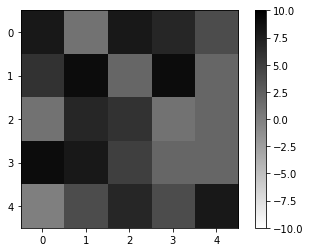

In [59]:
plt.imshow(a, vmin=-10, vmax=10, cmap='gray_r')
plt.colorbar()

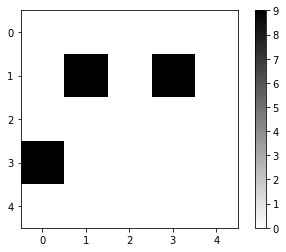

In [57]:
plt.imshow(np.where(a<9, 0, a), vmin=0, vmax=9, cmap='gray_r')
plt.colorbar()